In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_dir = 'data'

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 795 files belonging to 4 classes.


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [6]:
batch_size = 32
image_size = (128, 128)

In [7]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

# Load data using flow_from_directory for validation
valid_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 638 images belonging to 4 classes.
Found 157 images belonging to 4 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 neurons for four classes
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [11]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
20/20 [==============================] - 26s 1s/step - loss: 1.9615 - accuracy: 0.2508 - val_loss: 1.3513 - val_accuracy: 0.2166
Epoch 2/10
20/20 [==============================] - 16s 824ms/step - loss: 1.2776 - accuracy: 0.3589 - val_loss: 1.1074 - val_accuracy: 0.5605
Epoch 3/10
20/20 [==============================] - 15s 754ms/step - loss: 0.9711 - accuracy: 0.6207 - val_loss: 0.8734 - val_accuracy: 0.6688
Epoch 4/10
20/20 [==============================] - 15s 765ms/step - loss: 0.6597 - accuracy: 0.7790 - val_loss: 0.5500 - val_accuracy: 0.8471
Epoch 5/10
20/20 [==============================] - 15s 771ms/step - loss: 0.3663 - accuracy: 0.8950 - val_loss: 0.3921 - val_accuracy: 0.8981
Epoch 6/10
20/20 [==============================] - 15s 770ms/step - loss: 0.2118 - accuracy: 0.9436 - val_loss: 0.3977 - val_accuracy: 0.8790
Epoch 7/10
20/20 [==============================] - 15s 773ms/step - loss: 0.1086 - accuracy: 0.9796 - val_loss: 0.3174 - val_accuracy: 0.9363
Ep

1/1 [==============================] - 0s 45ms/step


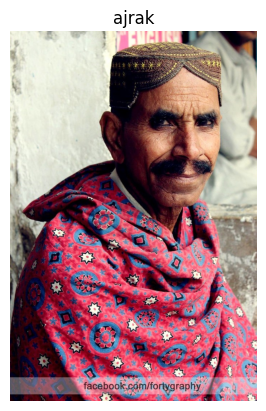

In [46]:
import matplotlib.image as mpimg
test_image_path = 'test/ajrakman.jpg'  # Change the path to your test image
test_image = tf.keras.utils.load_img(test_image_path, target_size=(128, 128))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = test_image.reshape(1, 128, 128, 3)
predictions = model.predict(test_image)

# Display the test image and prediction result
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('off')
class_labels = ['ajrak', 'balochi','kalash', 'shalwarKameez']
predicted_class = class_labels[np.argmax(predictions)]
plt.title(predicted_class)
plt.show()